# LAB 7: Error analysis

Objectives
* Construct a  linear text classifier using SGDClassifier
* Evaluate its performance and categorize the errors that it makes
* Eaxmine model's coefficients and decision function values
* Interpret model results using LIME

In [1]:
import pickle

import cloudpickle
import numpy as np
import pandas as pd
from cytoolz import *
from tqdm.auto import tqdm

tqdm.pandas()

---

## Load data

In [2]:
train, test = pickle.load(open("/data/politics.pkl", "rb"))

In [3]:
sgd = cloudpickle.load(open("sgd.model", "rb"))
svm = cloudpickle.load(open("svm.model", "rb"))

---

## LIME

In [4]:
import matplotlib.pyplot as plt
from lime.lime_text import LimeTextExplainer

In [5]:
predicted = sgd.predict(test["text"])

In [6]:
def boundary(X):
    t = sgd.decision_function(X)
    return np.vstack([t, -t]).T

In [7]:
explainer = LimeTextExplainer()# for explaining the predictions of machine learning models.

In [8]:
exp = explainer.explain_instance(test["text"].iloc[0], boundary, labels=(0,))# to generate an explanation for class 0

[]

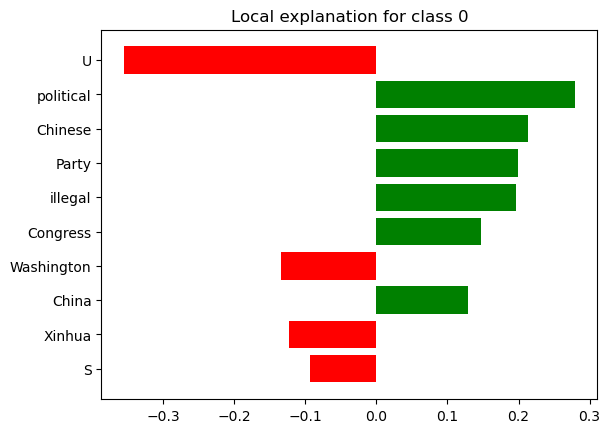

In [9]:
exp.as_pyplot_figure(0)
plt.plot()

**The above graph is an explanation about 1st row , label 0.**
**From the above graph we can infer that political,party, illegal, congress looks like strong political words**
**On the other hand US as itll be mentioned in any text it might not be a political word, same goes with china washington**

In [10]:
err = test[(test["pol"] == False) & (predicted == True)]

In [11]:
err.iloc[0]["text"]

'Ex-dissident visits Russia as Israeli minister. Natan Sharansky, forced out of the Soviet Union in 1986 after years of persecution for defending Jewish emigration, returned to Moscow on Monday in his new position as Israel\'s Trade and Industry Minister. "I am returning to a country where I spent many years, whose laguage I know, whose culture I share," Sharansky told reporters when he arrived at Moscow\'s international airport Sheremetyevo. Sharansky, 49, appeared far less excited than his elderly mother Ida Milgrom, who had followed her son into exile and was accompanying him on his return to Moscow. Sharansky, once one of the most celebrated Soviet dissidents in the West, turned down an invitation to visit Russia after the collapse of the Soviet Union in 1991. He changed his mind after becoming a minister in Benjamin Netanyahu\'s government following the success of his Yisrael ba-Aliya (Israel of Immigration) party in Israel\'s parliamentary elections last May. Sharansky has brough

**The text in row 1 is predicted incorrect. The text is actually talking about  text is about Natan Sharansky's visit to Russia to discuss about trade and industry. It might be because the text has strong politicl words like-party**

[]

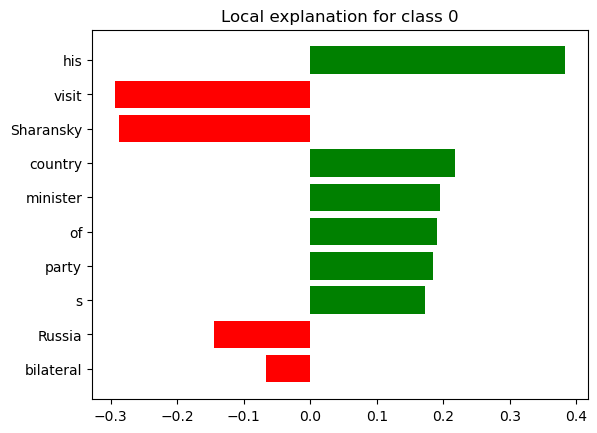

In [12]:
exp = explainer.explain_instance(err.iloc[0]["text"], boundary, labels=(0,))
exp.as_pyplot_figure(0)
plt.plot()

In [13]:
false_poli= test[(test["pol"] == True) & (predicted == False)]

In [14]:
false_poli.iloc[0]["text"]

'Zaire and rebels drift further apart on peace plan. Rebels thrusting deeper in eastern Zaire on Thursday rejected the government\'s call for international monitors to help implement a U.N. truce plan. The government in turn again ruled out negotiations between ailing President Mobutu Sese Seko and rebel leader Laurent Kabila, who links a ceasefire to such talks. "Kabila is a mere puppet. How can President Mobutu negotiate with him while it\'s known that he is only a front man for the aggressors," Deputy Foreign Minister Lokondo Yoka told reporters in the capital Kinshasa. "Zaire has been attacked by Rwanda, Burundi and Uganda," he said. "If any Zairean who opposes the regime can take up arms to seize power with the support of foreign countries, this would be unfortunate." On Thursday French Foreign Minister Herve de Charette accused Uganda directly of intervening in Zaire. But he indicated France, which wants U.N. intervention to stop hostilities in a move that could save Mobutu\'s cr

[]

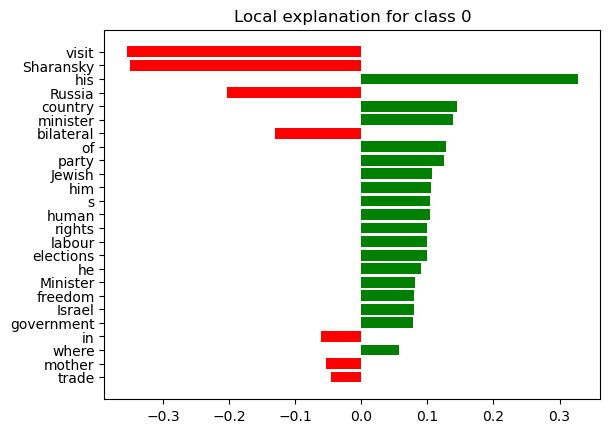

In [15]:
exp = explainer.explain_instance(err.iloc[0]["text"], boundary,num_features=25, labels=(0,))
exp.as_pyplot_figure(0)
plt.plot()

In [16]:
#strong politics word , not strong politics word

In [17]:
#try new classifiers , do error analysis , do sgd look coeff , write para abt
#finding-why that classsifir, wt errors how can imrove, wt limitations

# Conclusion
**Party, Elections, Freedom, Minister,Country,Jewish fall in to strong poltical words , overally.**
**Russia, bilateral,mother trade-are not strong political words**
**There are some errors which can be improed by doing hyperparameter search.**
****
